# Basics > Goodness of fit

<div class="alert alert-info">Evaluate the discrete distribution of a categorical variable</div>

A goodness of fit test is a statistical hypothesis test that compares observed data with the expected data according to a specific model or distribution. It is used to determine if the sample data is a good fit to the expected theoretical or expected distribution.

The test essentially evaluates whether there is a significant difference between the observed frequency and the expected frequency in one or more categories of a contingency or frequency table. The expected frequency is what we would expect to observe if the null hypothesis of no difference is true.

The most common type of goodness of fit test is the chi-square goodness of fit test. It is based on the chi-square statistic, which follows a chi-square distribution when the null hypothesis is true. The chi-square statistic is calculated by summing the squared difference between observed and expected frequencies, divided by the expected frequency, for each category.

The null hypothesis (H0) for a goodness of fit test usually states that the data follows a certain distribution or that the proportions of categories in the data follow specified proportions. The alternative hypothesis (Ha) is that the data does not follow the proposed distribution or the proportions are not as specified.

If the p-value of the test is below a pre-specified significance level (usually 0.05), the null hypothesis is rejected, indicating that the data does not fit the proposed model well. If the p-value is above the significance level, there is insufficient evidence to reject the null hypothesis, and we conclude that the data fits the proposed model.

In [1]:
import polars as pl
import pyrsm as rsm

In [2]:
## setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

### Example

The data are from a sample of 580 newspaper readers that indicated (1) which newspaper they read most frequently (USA today or Wall Street Journal) and (2) their level of income (Low income vs. High income). The data has three variables: A respondent identifier (id), respondent income (High or Low), and the primary newspaper the respondent reads (USA today or Wall Street Journal).

We will examine if the observed frequencies of newspaper preference match the expected frequencies, e.g., equal frequency, indicating a good fit. In particular, we conduct a goodness of fit test with the following null and alternative hypotheses:

* H0: The observed frequencies of income level (high/low) matches the expected frequencies (50-50).
* Ha: The observed frequencies of income level (high/low) does not match the expected frequencies

If the null-hypothesis is rejected, it suggests that the model is not a good fit and we can investigate which cell(s) contribute to the deviation from expected frequencies. To conduct this test, we will choose Income as the categorical variable of interest. This test involves assessing the size of the difference between the observed and expected frequencies. The expected frequencies are calculated under the assumption of H0 (i.e., a good fit) as (Row total x Column Total) /  Overall Total.

In [3]:
# load example data from the pyrsm library
newspaper = pl.read_parquet("https://github.com/radiant-ai-hub/pyrsm/raw/refs/heads/main/examples/data/basics/newspaper.parquet")
newspaper.head()

id,Income,Newspaper
i32,enum,enum
1,"""Low Income""","""USA Today"""
2,"""Low Income""","""USA Today"""
3,"""Low Income""","""USA Today"""
4,"""High Income""","""USA Today"""
5,"""Low Income""","""USA Today"""


In [4]:
rsm.md("https://raw.githubusercontent.com/radiant-ai-hub/pyrsm/refs/heads/main/examples/data/basics/newspaper_description.md")

## Newspaper readership

### Description

Data from a sample for 580 newspaper readers indicating which newspaper they read most frequently (USA today or Wall Street Journal) and their level of income (Low income vs. High income).

### Variables

A data frame with 580 observations on 3 variables

- id = Respondent identifier
- Income = A factor indicating if a respondent has High or Low income. Factor was created using a median split on income data
- Newspaper = A factor indicating the primary newspaper the respondent reads (USA today or Wall Street Journal)

To create a `goodness` object use `rsm.basics.goodness`. The created object has attributes and methods that you can use to get the information you need. For example. the `.expected` attribute shows the expected values under the null-hypothesis as a Pandas DataFrame.

In [5]:
gf = rsm.basics.goodness({"newspaper": newspaper}, var="Income")

In [6]:
gf.observed

High Income,Low Income,Total
i64,i64,i32
221,359,580


In [7]:
gf.expected.with_columns((pl.col(pl.Float32, pl.Float64)).round(2))

High Income,Low Income,Total
f64,f64,f64
290.0,290.0,580.0


`goodness` objects have two methods: `summary()` and `plot()`. 

In [8]:
gf.summary(output=["observed", "expected", "chisq"])

Goodness of fit test
Data         : newspaper
Variable     : Income
Probabilities: 0.5 0.5
Null hyp.    : The distribution of Income is consistent with the specified distribution
Alt. hyp.    : The distribution of Income is not consistent with the specified distribution

Observed:
┌─────────────┬────────────┬───────┐
│ High Income ┆ Low Income ┆ Total │
╞═════════════╪════════════╪═══════╡
│ 221         ┆ 359        ┆ 580   │
└─────────────┴────────────┴───────┘

Expected: total x p
┌─────────────┬────────────┬───────┐
│ High Income ┆ Low Income ┆ Total │
╞═════════════╪════════════╪═══════╡
│ 290.0       ┆ 290.0      ┆ 580.0 │
└─────────────┴────────────┴───────┘

Contribution to chi-squared: (observed - expected) ^ 2 / expected
┌─────────────┬────────────┬───────┐
│ High Income ┆ Low Income ┆ Total │
╞═════════════╪════════════╪═══════╡
│ 16.42       ┆ 16.42      ┆ 32.84 │
└─────────────┴────────────┴───────┘



Chi-squared: 32.834 df (1), p.value < .001


The (Pearson) chi-squared test evaluates if we can reject the null-hypothesis that the categorical variable is distributed as specified under the null hypothesis. It does so by comparing the observed frequencies (i.e., what we actually see in the data) to the expected frequencies (i.e., what we would expect to see if the two variables were independent). If there are big differences between the table of expected and observed frequencies, the chi-square value will be _large_. The chi-square value for each cell is calculated as $(o - e)^2 / e$, where $o$ is the observed frequency in a cell and $e$ is the expected frequency in that cell if the null hypothesis holds. These chi-square values can be shown by adding `output="chisq"` as an argument to the `.summary()` method of a `goodness` object. The overall chi-square value is obtained by summing the chi-square values across all cells, i.e., it is the sum of the values shown in the _Contribution to chi-squared_ table.

In order to determine if the overall chi-square statistics can be considered _large_ we first determine the degrees of freedom (df). In particular: $df = (\# \text{groups in the data} - 1)$. In a 1x5 table, we have $(5-1) = 4$ df. The output from `gf.summary()` shows the value of the chi-square statistic, the associated df, and the p.value associated with the test.

Remember to check the expected values: All expected frequencies are larger than 5 therefore the p.value for the chi-square statistic is unlikely to be biased. As usual we reject the null-hypothesis when the p.value is smaller 0.05. Since our p.value is very small (< .001) we can reject the null-hypothesis (i.e., suggests that the frequency of income level is not evenly distributed).

We can use the provided p.value associated with the Chi-squared value of 32.84 to evaluate the null hypothesis. However, we can also calculate the critical Chi-squared value using the probability calculator in in the `pyrsm` package. As we can see from the output below, that value is 3.841 if we choose a 95% confidence level. Because the calculated Chi-square value is larger than the critical value (32.384 > 3.841) we reject null hypothesis that newspaper readership is evenly distributed.

Probability Calculator
Distribution: Chi-square
Df          : 1
Mean        : 1
Variance    : 2
Lower bound : 0
Upper bound : 0.95

P(X < 3.841) = 0.95
P(X > 3.841) = 0.05


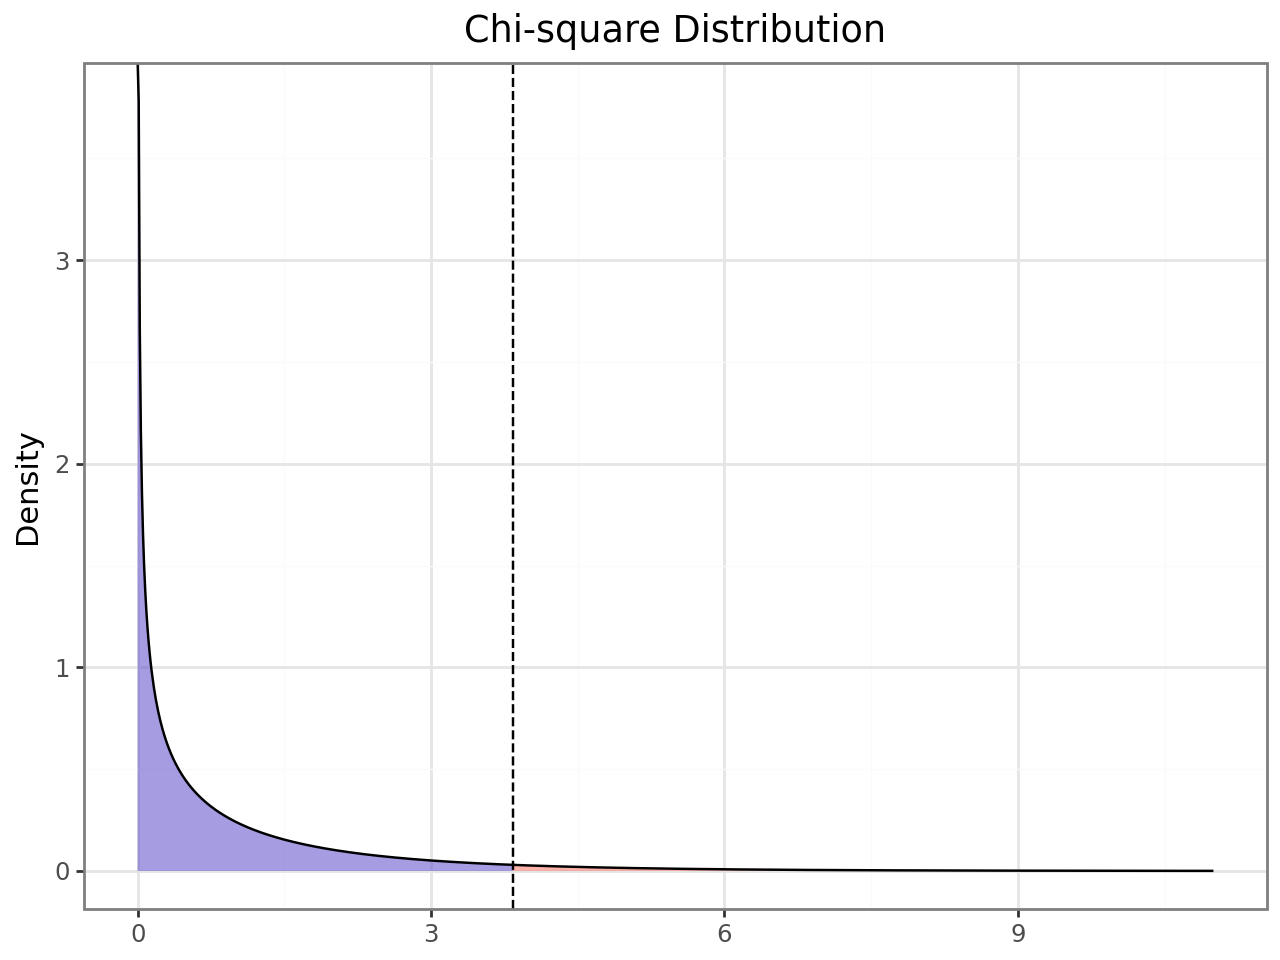

In [9]:
pc = rsm.basics.prob_calc("chisq", df=1, pub=0.95)
pc.summary()
pc.plot()

We can also use the probability calculator to determine the p.value associated with the calculated Chi-square value. Consistent with the output from the `.summary()` method shown above this `p.value` is `< .001`.

Probability Calculator
Distribution: Chi-square
Df          : 1
Mean        : 1
Variance    : 2
Lower bound : 0
Upper bound : 32.84

P(X < 32.84) = 1.0
P(X > 32.84) = 0.0


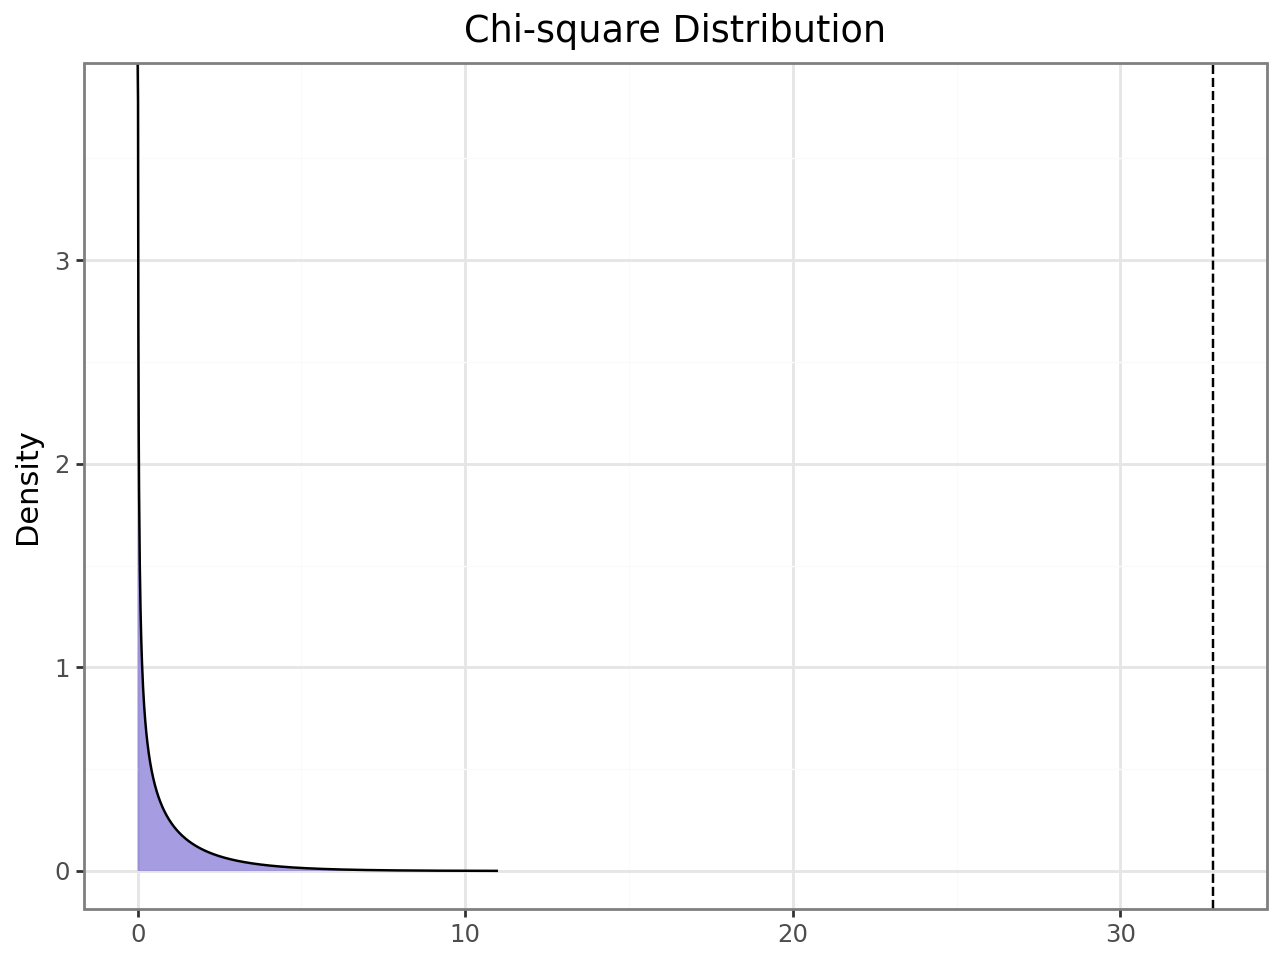

In [10]:
pc = rsm.basics.prob_calc("chisq", df=1, ub=32.84)
pc.summary()
pc.plot()

In addition to the numerical output provided by the `.summary()` method we can evaluate the hypothesis visually using the `.plot()` method of the `goodness` object. In addition to the distribution of observed and expected frequencies, we will also plot the standardized deviations (i.e., standardized differences between the observed and expected table). This measure is calculated as $(o-e)/sqrt(e)$, i.e., a score of how different the observed and expected frequencies in one cell in our table are. When a cell's standardized deviation is greater than 1.96 (in absolute value) the cell has a significant deviation from the model of equal frequency.

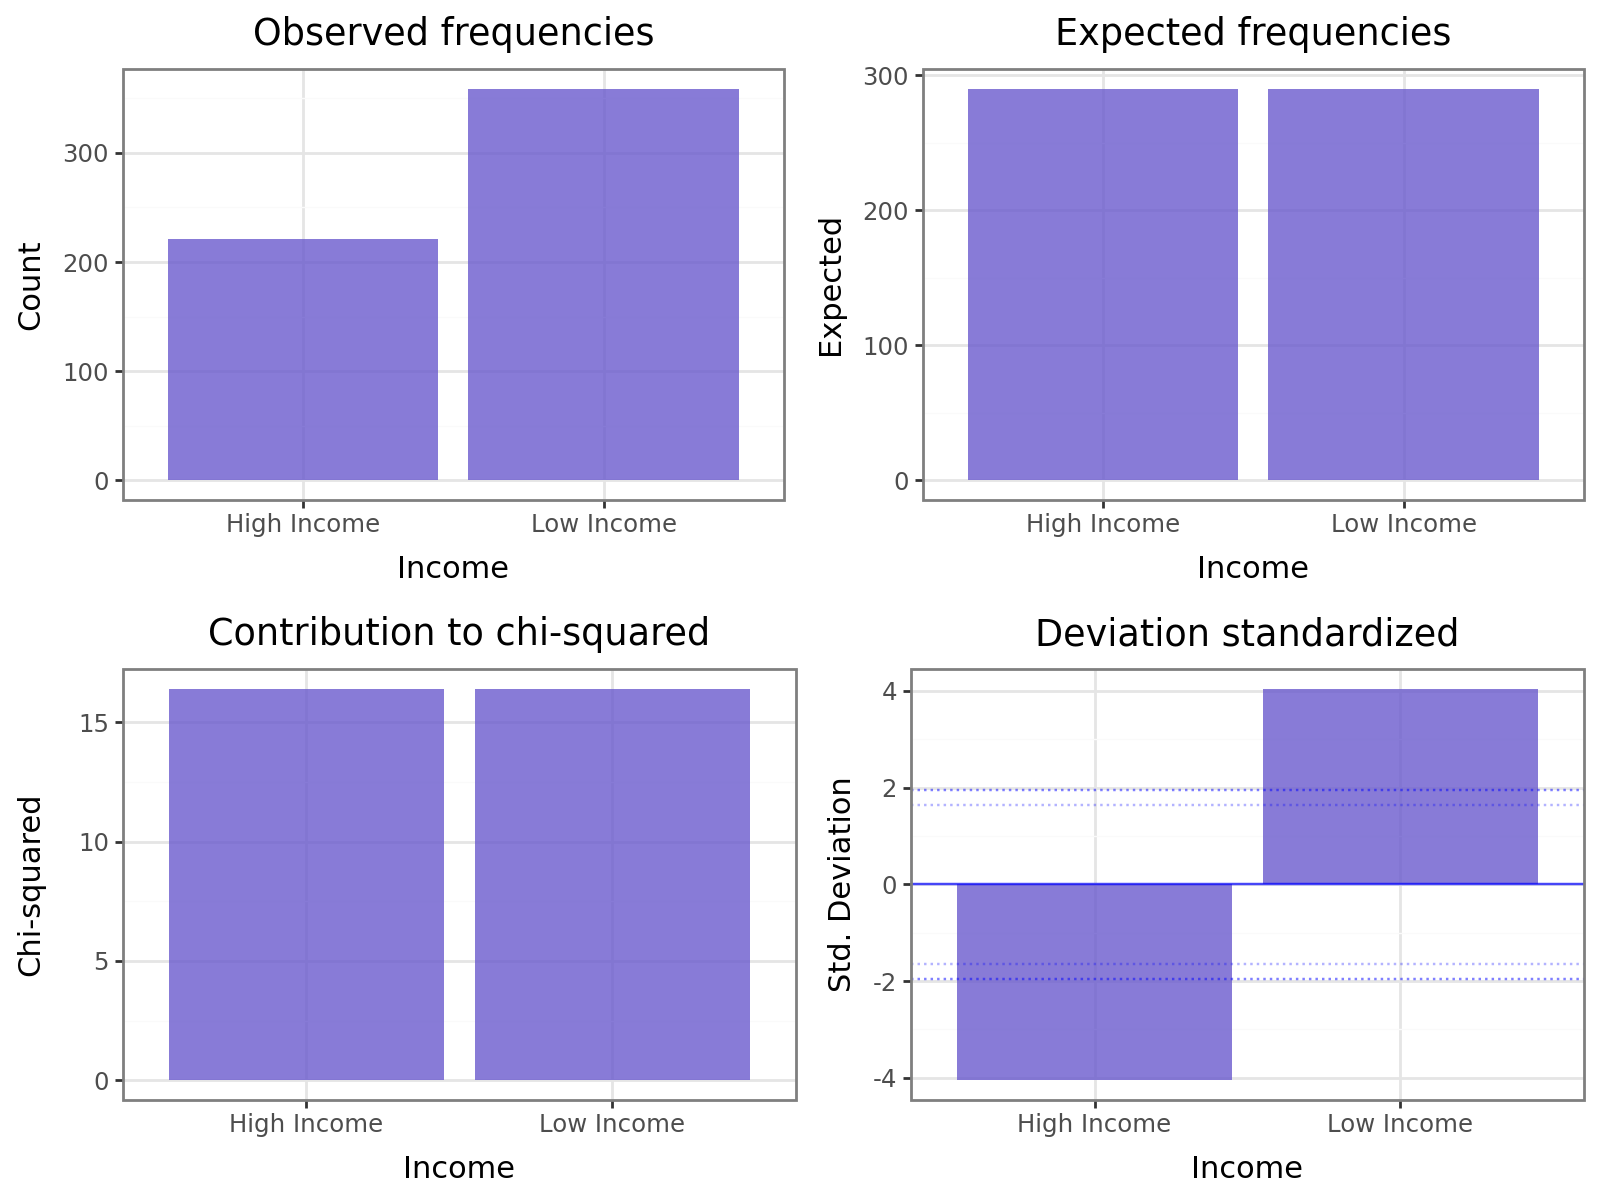

In [11]:
gf.plot(plots=["observed", "expected", "chisq", "dev_std"])

In the last plot above we see that both cells contribute to deviation from the expected distribution as both standardized deviations are larger than 1.96 in absolute value (i.e., the bars extend beyond the outer dotted line in the plot).

In other words, there seem to be fewer high income respondents and more high income respondents than expected if the null hypothesis of equal distribution were true.

### Technical note

When one or more expected values are small (e.g., 5 or less) the p.value for the Chi-squared test is biased and it may be necessary to _collapse_ categories and recalculate the test statistic.

© Vincent Nijs (2026)